In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

using DataFrames, Statistics, LaTeXStrings, GraphIO, GraphPlot, Graphs, PyPlot, SNAPDatasets, StatsBase
using PyPlot: grid as grd
using Revise

includet("GrapevineModel.jl")
using .GrapevineModel

  Activating project at `~/projects/network-learning`


In [25]:
s0 = 1
n = 1000
theta = 0.6
d_test = 10
p = 0.8
mu10 = 0.2
mu01 = 0.25
params = (p, mu10, mu01)

g = watts_strogatz(n, 10, 0.1)

{1000, 5000} undirected simple Int64 graph

In [26]:
sources = sample(vertices(g), 6; replace=false)
msgs = Dict(sources .=> [1, 1, 1, 1, 1, 1])
instance = Grapevine(g, sources, msgs, mu10, mu01, p, theta)

Grapevine
  g: SimpleGraph{Int64}
  sources: Array{Int64}((6,)) [816, 168, 487, 890, 380, 125]
  source_msg: Dict{Int64, Int64}
  mu10: Float64 0.2
  mu01: Float64 0.25
  p: Float64 0.8
  theta: Float64 0.6


In [27]:
true_inf = influence(instance)

method = analytic
Average learned probability = 0.616


0.6160479017637323

In [28]:
dists_from_sources = Dict(sources .=> [gdistances(g, s) for s in sources])

Dict{Int64, Vector{Int64}} with 6 entries:
  168 => [6, 5, 5, 5, 5, 5, 4, 4, 5, 5  …  6, 5, 6, 6, 6, 6, 5, 6, 5, 5]
  380 => [4, 4, 4, 4, 4, 5, 5, 4, 5, 4  …  2, 2, 3, 2, 2, 3, 3, 3, 3, 3]
  487 => [5, 5, 5, 5, 5, 5, 4, 5, 5, 4  …  6, 5, 5, 5, 5, 5, 4, 5, 5, 5]
  890 => [3, 3, 3, 4, 4, 4, 4, 4, 5, 4  …  4, 4, 3, 3, 3, 3, 3, 2, 4, 3]
  816 => [4, 6, 5, 5, 5, 5, 6, 5, 5, 5  …  5, 5, 4, 5, 5, 4, 5, 5, 5, 5]
  125 => [4, 4, 4, 4, 3, 3, 3, 3, 3, 2  …  3, 3, 4, 4, 4, 4, 4, 5, 5, 4]

In [29]:
N_runs = 100
N_test = 10:10:150
data = Dict(N_test .=> [zeros(N_runs) for _ in N_test])
for N in N_test
    println(N)
    for i in 1:N_runs
        exp_runs = run_experiment(instance, N; dists_from_sources = dists_from_sources)
        data[N][i] = mean([mean(values(x)) for x in values(exp_runs)])
    end
end

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150


In [11]:
data[10]

100-element Vector{Float64}:
 0.7880781159644187
 0.7880180664490664
 0.787193004961635
 0.7906126654756507
 0.7896125438693423
 0.7874208169270651
 0.7834981128759841
 0.7855261618879887
 0.7846568281763923
 0.7905978976418396
 0.7857785733448838
 0.7848562734027931
 0.7859460084946963
 ⋮
 0.7867282624129844
 0.785242003621214
 0.7840826093303687
 0.7908948551599442
 0.7903283290370978
 0.7878143908896446
 0.7853433159752277
 0.7869122937166624
 0.790365035434797
 0.7841617686635075
 0.7877773064765942
 0.7873770404598718

In [30]:
data_mean = [mean((data[x] .- true_inf)./true_inf) for x in N_test]
data_std = [std((data[x] .- true_inf)./true_inf) for x in N_test]

15-element Vector{Float64}:
 0.0013032791528719899
 0.0010690840903401833
 0.0008655627304858639
 0.0006499111066623627
 0.0007031610705089917
 0.0005745606984759889
 0.0005069469880862882
 0.0005155824774937341
 0.0004745429621305887
 0.0004546632720606992
 0.0004939932041570547
 0.0003992341494701908
 0.0004084392065698262
 0.00038275842814827315
 0.0003586555380737282

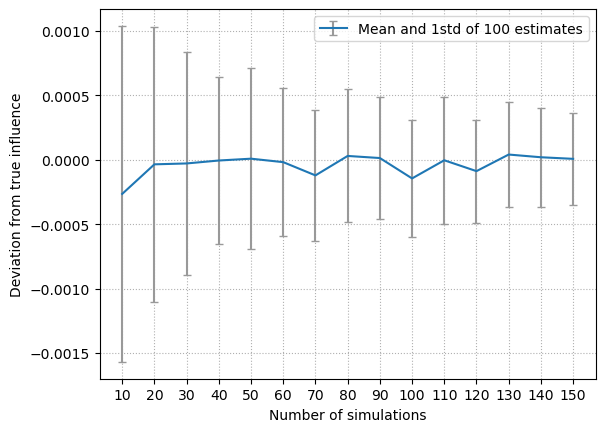

PyObject <matplotlib.legend.Legend object at 0x7f759fe5d3d0>

In [31]:
errorbar(N_test, data_mean, yerr=data_std, capsize=3, ecolor="0.6", label="Mean and 1std of 100 estimates")
# axhline(0, c="0.5", ls=":")
grd(ls=":")
ylabel("Deviation from true influence")
xlabel("Number of simulations")
xticks(N_test)
legend()
# savefig("figs/influence_sim2.png")
# savefig("figs/influence_sim2.pdf")